                                   NETFLIX EDA AND DATA VISULAZATION


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("Netflix_data.csv")
df


In [39]:
print(len(df))
df.info()
df.describe(include="all")

8807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [40]:
# to check no of null values
df.isna().sum()#*100/df.shape[0]

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [41]:
df["type"].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [42]:
#Nested data solve for director column
df_d= df["director"].apply(lambda x : str(x).split(",")).to_list()
df_d
df_director=pd.DataFrame(df_d,index=df["title"])
df_director=df_director.stack()
df_director=pd.DataFrame(df_director.reset_index())
df_director=df_director.rename(columns={0:"Director"})
df_director=df_director.drop(columns=["level_1"])
df_director

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [43]:
#Nested data solve for cast column
df_c= df["cast"].apply(lambda x : str(x).split(",")).to_list()
df_c
df_cast=pd.DataFrame(df_c,index=df["title"])
df_cast=df_cast.stack()
df_cast=pd.DataFrame(df_cast.reset_index())
df_cast=df_cast.rename(columns={0:"cast"})
df_cast=df_cast.drop(columns=["level_1"])
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [44]:
df_cnty= df["country"].apply(lambda x : str(x).split(",")).to_list()
df_cnty
df_country=pd.DataFrame(df_cnty,index=df["title"])
df_country=df_country.stack()
df_country=pd.DataFrame(df_country.reset_index())
df_country=df_country.rename(columns={0:"country"})
df_country=df_country.drop(columns=["level_1"])
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [45]:
#Nested data solve for listed_in column
df_l= df["listed_in"].apply(lambda x : str(x).split(",")).to_list()
df_l
df_listed_in=pd.DataFrame(df_l,index=df["title"])
df_listed_in=df_listed_in.stack()
df_listed_in=pd.DataFrame(df_listed_in.reset_index())
df_listed_in=df_listed_in.rename(columns={0:"Genre"})
df_listed_in=df_listed_in.drop(columns=["level_1"])
df_listed_in

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [46]:
#popular genre

df_listed_in.groupby("Genre").aggregate({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)

,Genre,title
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
...,...,...
59,Romantic Movies,3
62,Spanish-Language TV Shows,2
70,TV Sci-Fi & Fantasy,1
55,LGBTQ Movies,1


In [47]:
df_country.groupby("country").aggregate({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)

,country,title
191,United States,3211
141,India,1008
197,nan,831
190,United Kingdom,628
106,United States,479
...,...,...
103,Ukraine,1
30,Ecuador,1
56,Liechtenstein,1
102,Uganda,1


In [48]:
df_final1=pd.merge(df_director,df_cast,on="title",how="inner")
df_final2=pd.merge(df_country,df_listed_in,on="title",how="inner")
df_final=pd.merge(df_final1,df_final2,on="title",how="inner")
df_final
df_final["cast"].replace(["nan"],["unknown"],inplace=True)
df_final["Director"].replace(["nan"],["unknown"],inplace=True)
df_final["country"].replace(["nan"],["unknown"],inplace=True)
df_final["Genre"].replace(["nan"],["unknown"],inplace=True)
df_final

,title,Director,cast,country,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,Documentaries
1,Blood & Water,unknown,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,unknown,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,unknown,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,unknown,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [49]:
df_analysis=pd.merge(df_final,df[["show_id","type","title","date_added","release_year","rating","duration"]],on="title",how="left")
df_analysis

,title,Director,cast,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,unknown,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [50]:
#null vALUES CHECK AGAIN
df_analysis.isna().sum()*100/df_analysis.shape[0]

title           0.000000
Director        0.000000
cast            0.000000
country         0.000000
Genre           0.000000
show_id         0.000000
type            0.000000
date_added      0.078193
release_year    0.000000
rating          0.033158
duration        0.001485
dtype: float64

In [51]:
df_analysis.dropna(subset=["duration","rating","release_year"],axis=0,inplace=True)
df_analysis

,title,Director,cast,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,unknown,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [52]:
df_analysis["country"].fillna(df_analysis["country"].value_counts().idxmax(),inplace=True)
df_analysis


,title,Director,cast,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,unknown,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,unknown,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,unknown,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,unknown,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [53]:
#Analysis with the above final data after clearing the nested and missing values

df_movies=df_analysis[df_analysis["type"]=="Movie"]
df_tvshows=df_analysis[df_analysis["type"]=="TV Show"]
df_movies


,title,Director,cast,country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91 min
160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91 min
161,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91 min
162,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown,Children & Family Movies,s7,Movie,"September 24, 2021",2021,PG,91 min
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [54]:
# the ratings of the most movies and tvshows
mr=df_movies.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
tr=df_tvshows.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
print(mr)
print(tr)

  rating  title
8  TV-MA   2062
6  TV-14   1427
5      R    797
9  TV-PG    540
4  PG-13    490
  rating  title
4  TV-MA   1145
2  TV-14    733
5  TV-PG    323
7  TV-Y7    195
6   TV-Y    176


In [55]:
# the genre in which most movies and tvshows are made
mg=df_movies.groupby(["Genre"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
tg=df_tvshows.groupby(["Genre"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
print(mg)
print(tg)

                    Genre  title
10   International Movies   2624
25                 Dramas   1599
22               Comedies   1210
18     Action & Adventure    859
24          Documentaries    829
                      Genre  title
24   International TV Shows    774
13                TV Dramas    696
3    International TV Shows    576
12              TV Comedies    460
22           Crime TV Shows    399


In [56]:
#movies and tvshows that are released most based on the country
mc=df_movies.groupby(["country"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
tc=df_tvshows.groupby(["country"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
print(mc)
print(tc)

            country  title
181   United States   2361
136           India    927
187         unknown    439
103   United States    388
180  United Kingdom    382
            country  title
100   United States    847
102         unknown    391
99   United Kingdom    246
69            Japan    173
90      South Korea    164


In [57]:
#cast who played the most in the movies and tvshows
df_cast_movies=df_movies.groupby(["cast"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
df_cast_movies=df_cast_movies[df_cast_movies['cast']!='unknown'].head()
df_cast_tvshows=df_tvshows.groupby(["cast"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
df_cast_tvshows=df_cast_tvshows[df_cast_tvshows['cast']!='unknown'].head()
print(df_cast_movies)
print(df_cast_tvshows)

                 cast  title
1943      Anupam Kher     38
16776         Om Puri     27
19229    Rupa Bhimani     27
27283  Shah Rukh Khan     26
17019    Paresh Rawal     25
                     cast  title
11962    Takahiro Sakurai     24
6130       Junichi Suwabe     17
13192           Yuki Kaji     17
222             Ai Kayano     16
13911  David Attenborough     14


In [58]:
#director who directed the most movies and tvshows
df_dmovies=df_movies.groupby(["Director"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
df_dmovies=df_dmovies[df_dmovies["Director"]!="unknown"].head(7)
df_dshows=df_tvshows.groupby(["Director"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False)
df_dshows=df_dshows[df_dshows["Director"]!="unknown"].head(7)
print(df_dmovies)
print(df_dshows)

                 Director  title
3816        Rajiv Chilaka     22
3863          Raúl Campos     18
234             Jan Suter     18
4427          Suhas Kadav     16
3065         Marcus Raboy     15
2307            Jay Karas     15
1288  Cathy Garcia-Molina     13
                   Director  title
187               Ken Burns      3
86      Alastair Fothergill      3
24    Gautham Vasudev Menon      2
155          Iginio Straffi      2
173           Joe Berlinger      2
183              Jung-ah Im      2
255         Rob Seidenglanz      2


In [59]:
# the duration of the most movies and tvshows
md=df_movies.groupby(["duration"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
td=df_tvshows.groupby(["duration"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)
print(md)
print(td)

    duration  title
195   90 min    152
198   93 min    146
199   94 min    146
202   97 min    146
196   91 min    144
     duration  title
0    1 Season   1791
7   2 Seasons    425
8   3 Seasons    199
9   4 Seasons     95
10  5 Seasons     65


In [60]:
#average duration of movies and tvshows
df_movies["duration"].str.split(expand=True)[0].astype(int).mean().round()
df_tvshows["duration"].str.split(expand=True)[0].astype(int).mean().round()

2.0

In [61]:
#duration bracket in which the most number of films are made
df_movies["_duration"]=df_movies["duration"].str.split(expand=True)[0].astype(int)
bins=[1,50,80,100,120,150,200,315]
labels = ['1-50', '50-80', '80-100', '100-120', '120-150', '150-200', '200-315']
df_movies["duration_bins"]=pd.cut(df_movies["_duration"],bins=bins,labels=labels)
df_movies
df_movies.groupby(["duration_bins"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],ascending=False).head(5)

,duration_bins,title
2,80-100,2221
3,100-120,1671
4,120-150,897
1,50-80,806
0,1-50,286


In [62]:
df_analysis["year_added"]=pd.to_datetime(df_analysis["date_added"]).dt.year
df_analysis

,title,Director,cast,country,Genre,show_id,type,date_added,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,2021.0
1,Blood & Water,unknown,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021.0
2,Blood & Water,unknown,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021.0
3,Blood & Water,unknown,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021.0
4,Blood & Water,unknown,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019.0
202061,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019.0
202062,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019.0
202063,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,2019.0


In [63]:
#saved in another variable to avoid data loss
df_final=df_analysis.copy(deep=True)

In [64]:
# Director with most no of movie release in a single year
df_dm=df_movies.groupby(["Director","release_year"]).agg({"title":"nunique"}).reset_index().sort_values(["title"],ascending=False)
df_dm=df_dm[df_dm["Director"]!="unknown"].head(10)
df_dm
# Director with most no of tv season release in a single year
df_dt=df_tvshows.groupby(["Director","release_year"]).agg({"title":"nunique"}).reset_index().sort_values(["title"],ascending=False)
df_dt=df_dt[df_dt["Director"]!="unknown"].head(10)
df_dt
print(df_dm)
print(df_dt)

                 Director  release_year  title
4935          Raúl Campos          2018     12
248             Jan Suter          2018     12
4856        Rajiv Chilaka          2013      6
3835         Marcus Raboy          2017      6
2606       Hidenori Inoue          2017      5
2093     Edward Cotterill          2017      4
3262       Justin G. Dyck          2018      4
5229       S.S. Rajamouli          2015      4
4921  Rathindran R Prasad          2021      4
5740          Suhas Kadav          2019      4
               Director  release_year  title
282         Stan Lathan          2017      2
159      Iginio Straffi          2017      2
223           Mateo Gil          2020      1
229         Mick Grogan          2018      1
228  Michel Tikhomiroff          2019      1
227       Michael Simon          2014      1
226     Michael Samuels          2012      1
225     Michael Cumming          2015      1
224       Mauricio Dias          2021      1
222            Mat King          

In [65]:
# Countries with most number of tv shows released in a single year
df_cr=df_tvshows.groupby(["country","release_year"]).agg({"title":"nunique"}).reset_index().sort_values(["title"],ascending=False)
df_cr=df_cr[df_cr["country"]!="unknown"].head(5)
df_cr
# Countries with most number of movies released in asingle year
df_cm=df_movies.groupby(["country","release_year"]).agg({"title":"nunique"}).reset_index().sort_values(["title"],ascending=False)
df_cm=df_cm[df_cm["country"]!="unknown"].head(5)
df_cm
print(df_cr)
print(df_cm)

           country  release_year  title
582  United States          2020    167
581  United States          2019    148
580  United States          2018    122
583  United States          2021    100
579  United States          2017     75
            country  release_year  title
1308  United States          2017    305
1309  United States          2018    264
1307  United States          2016    237
1310  United States          2019    234
1311  United States          2020    185


In [66]:
# Movies  released most during which month in each country
df_m=df_movies
df_m['month_added']=pd.to_datetime(df_m["date_added"]).dt.month
df_m1=df_m.groupby(["country","month_added"]).agg({"title":"nunique"}).reset_index().sort_values(["title","month_added"],ascending=False)
df_m1=df_m1.drop_duplicates("country",keep="first")
df_m1=df_m1[df_m1["country"]!="unknown"]
df_m1.head(10)

,country,month_added,title
952,United States,1,280
661,India,12,109
459,United States,9,44
951,United Kingdom,12,40
591,Egypt,6,40
639,Hong Kong,8,30
924,Turkey,4,30
712,Japan,9,27
543,Canada,12,23
806,Philippines,3,20


In [67]:
# tv shows released most during which month in each country
df_t=df_tvshows
df_t['month_added']=pd.to_datetime(df_t["date_added"]).dt.month
df_t1=df_t.groupby(["country","month_added"]).agg({"title":"nunique"}).reset_index().sort_values(["title","month_added"],ascending=False)
df_t1=df_t1.drop_duplicates("country",keep="first")
df_t1=df_t1[df_t1["country"]!="unknown"]
df_t1.head(10)

,country,month_added,title
507,United States,9.0,88
489,United Kingdom,3.0,38
431,South Korea,12.0,22
331,Japan,6.0,22
295,India,4.0,15
216,Canada,5.0,14
157,United States,1.0,13
456,Taiwan,8.0,12
187,Australia,7.0,12
244,Colombia,8.0,10


In [68]:
# Movies released most during which week in each country
df_f=df_movies
df_f['week_added']=pd.to_datetime(df_f["date_added"]).dt.week
df_f1=df_f.groupby(["country","week_added"]).agg({"title":"nunique"}).reset_index().sort_values(["title","week_added"],ascending=False)
df_f1=df_f1.drop_duplicates("country",keep="first")
df_f1=df_f1[df_f1["country"]!="unknown"]
df_f1.head(10)

,country,week_added,title
1936,United States,1,142
1256,India,1,86
1883,United Kingdom,1,26
1849,Turkey,10,22
775,United States,1,20
1236,Hong Kong,33,19
1107,Egypt,23,18
1620,Philippines,9,13
1430,Japan,37,12
234,France,1,11


In [69]:
# Tvshowsreleased most during which week in each country
df_s=df_tvshows
df_s['week_added']=pd.to_datetime(df_s["date_added"]).dt.week
df_s1=df_s.groupby(["country","week_added"]).agg({"title":"nunique"}).reset_index().sort_values(["title","week_added"],ascending=False)
df_s1=df_s1.drop_duplicates("country",keep="first")
df_s1=df_s1[df_s1["country"]!="unknown"]
df_s1.head(10)

,country,week_added,title
1003,United States,53.0,29
913,United Kingdom,13.0,21
795,South Korea,50.0,11
851,Taiwan,31.0,11
737,Singapore,26.0,9
522,India,13.0,9
586,Japan,1.0,9
141,Japan,53.0,8
88,France,53.0,6
355,Canada,27.0,6


<Axes: xlabel='title', ylabel='Genre'>

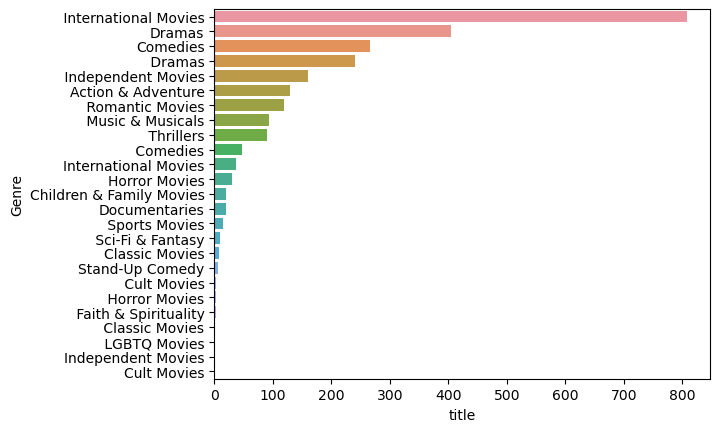

In [70]:
#charts
#movie genre most watched in india
df_mi=df_movies
df_mi
df_mi1=df_mi.groupby(["Genre","country"]).agg({"title":"nunique"}).reset_index().sort_values(["title"],ascending=False)
df_mi1=df_mi1.query("country=='India'")
sns.barplot(data=df_mi1,y="Genre",x="title")

<Axes: xlabel='title', ylabel='Genre'>

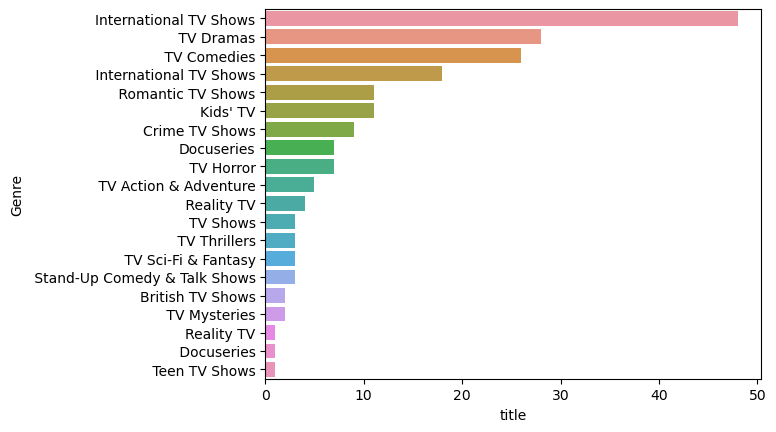

In [71]:
#tvshows genre most watched in india
df_ti=df_tvshows
df_ti
df_ti1=df_ti.groupby(["Genre","country"]).agg({"title":"nunique"}).reset_index().sort_values(["title"],ascending=False)
df_ti1=df_ti1.query("country=='India'")
sns.barplot(data=df_ti1,y="Genre",x="title")

<Axes: xlabel='year_added', ylabel='title'>

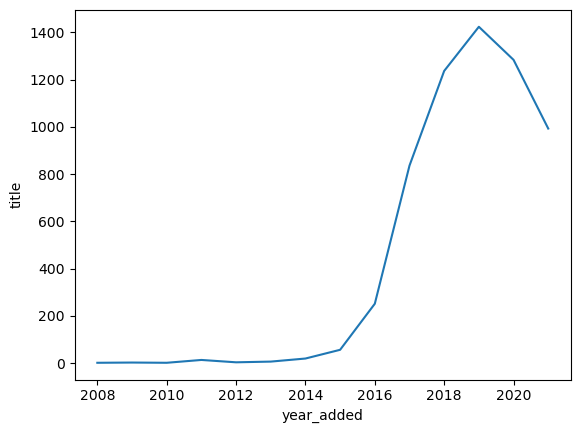

In [72]:
#trend of movies added in netflix
df_tm=df_movies
df_tm
df_tm["year_added"]=pd.to_datetime(df_tm["date_added"]).dt.year
df_tm1=df_tm.groupby(["year_added"]).agg({"title":"nunique"}).reset_index().sort_values(["title"],ascending=False)
df_tm1
sns.lineplot(data=df_tm1,x='year_added',y='title')

<Axes: xlabel='year_added', ylabel='title'>

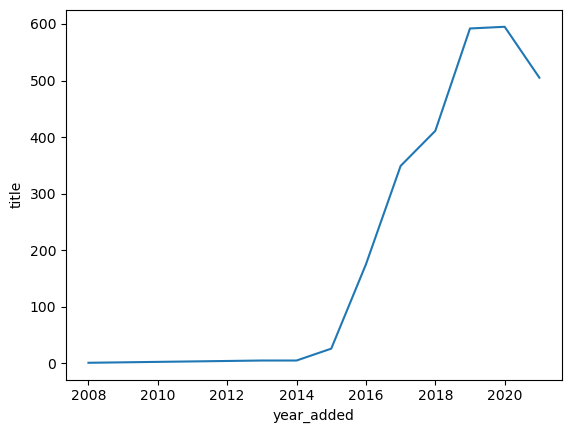

In [73]:
#trend of tvshows added in netflix
df_tt=df_tvshows
df_tt
df_tt["year_added"]=pd.to_datetime(df_tt["date_added"]).dt.year
df_tt1=df_tt.groupby(["year_added"]).agg({"title":"nunique"}).reset_index().sort_values(["title"],ascending=False)
df_tt1
sns.lineplot(data=df_tt1,x='year_added',y='title')